In [1]:
from plotconfig import*
import matplotlib.pyplot as plt
import numpy as np
from qutip import*


In [2]:
cm = 1.0/2.54
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['boxplot.flierprops.markerfacecolor'] = "none"
mpl.rcParams['boxplot.flierprops.markersize'] =4
mpl.rcParams['figure.figsize'] = [8*cm,4*cm]
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['xtick.major.size'] = 1
mpl.rcParams['ytick.major.size'] = 1
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['font.sans-serif'] ='Arial'
mpl.rcParams['font.size'] = 5
mpl.rcParams['axes.labelsize']= 5
mpl.rcParams['legend.fontsize'] = 5
mpl.rcParams["xtick.labelsize"] = 0

In [3]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

### 1. Blob amp decay

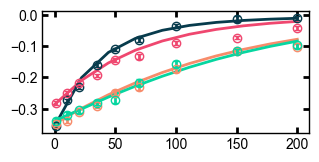

In [4]:
bootstrap_data = np.load('data/bootstrap_data.npy')
blob_amps = np.load('data/theo_curves.npz')["blob_amps"]
times = np.load('data/theo_curves.npz')["times"]
decay_times = np.array([  1000.,  10000.,  20000.,  35000.,  50000.,  70000., 100000.,
       150000., 200000.])*1e-3

# scaling with exp data amplitudes

vac_scale = 0.883


fig, ax = plt.subplots()

ax.tick_params(direction = "in", bottom=True, top=True, left=True, right=True, length=4, width=2, labelsize = 10)
#ax.grid();

# plot theory
ax.plot(times,np.array(blob_amps[0])*-2*bootstrap_data[0,0][0]/vac_scale, color = '#073B4C', label = 'theo 0 dB ')
ax.plot(times,np.array(blob_amps[1])*-2*bootstrap_data[0,1][0]/vac_scale,  label = 'theo 3 dB ', color = '#ef476f' )
ax.plot(times,np.array(blob_amps[2]/(-2*blob_amps[2][0]))*-2*bootstrap_data[0,2][0]/vac_scale, color = '#f78c6b',label = 'theo 6dB')
ax.plot(times,np.array(blob_amps[3]/(-2*blob_amps[3][0]))*-2*bootstrap_data[0,3][0]/vac_scale, color = '#06d6a0',label = 'theo 7 dB')

# plot experiment
ax.errorbar(decay_times[:], bootstrap_data[0,0]/vac_scale,yerr=bootstrap_data[1,0],fmt= 'o', markerfacecolor='none', label = '0dB', capsize = 2, color = '#073B4C',)
ax.errorbar(decay_times[:], bootstrap_data[0,1]/vac_scale,yerr=bootstrap_data[1,1],fmt= 'o',markerfacecolor='none', label = '3dB', capsize = 2,color = '#ef476f')
ax.errorbar(decay_times[:], bootstrap_data[0,2]/vac_scale,yerr=bootstrap_data[1,2],fmt= 'o',markerfacecolor='none', label = '6B', capsize = 2, color = '#f78c6b',)
ax.errorbar(decay_times[:], bootstrap_data[0,3]/vac_scale,yerr=bootstrap_data[1,3],fmt= 'o',markerfacecolor='none', label = '7dB', capsize = 2, color = '#06d6a0',)

ax.set_xlim()

#ax.set_title(f"cat- state with different degrees of squeezing different alpha, but same state overlap under loss", fontsize=18)
# ax.set_xlabel(r"$t$", fontsize=16)
# ax.set_ylabel("char blob amp", fontsize=16)
fig.tight_layout()


In [58]:
fig.savefig("fig4.pdf")

In [16]:
np.load('data/theo_curves.npz')

### 2. Char func cuts and their fourier Transform

In [5]:
def char_func_grid(state, xvec):
    """Calculate the Characteristic function as a 2Dgrid (xvec, xvec) for a given state.

    Args:
        state (Qobject): State of which we want to calc the charfunc
        xvec (_type_): array of displacements. The char func will be calculated for the grid (xvec, xvec)

    Returns:
        tuple(ndarray, ndarray): Re(char func), Im(char func)
    """
    cfReal = np.empty((len(xvec),len(xvec)))
    cfImag = np.empty((len(xvec),len(xvec)))
    N = state.dims[0][1]

    for i, alpha_x in enumerate(xvec):
        for j, alpha_p in enumerate(xvec):
            expect_value = expect(displace(N, alpha_x +1j*alpha_p),ptrace(state,1))
            cfReal[i,j] =  np.real(expect_value)
            cfImag[i,j] =  np.imag(expect_value)

    return cfReal,cfImag   
def char_func_cut(state, xvec, axis = 1):
    """Calculate the Characteristic function as a 2Dgrid (xvec, xvec) for a given state.

    Args:
        state (Qobject): State of which we want to calc the charfunc
        xvec (_type_): array of displacements. The char func will be calculated for the grid (xvec, xvec)

    Returns:
        tuple(ndarray, ndarray): Re(char func), Im(char func)
    """
    cfReal = np.empty((len(xvec)))
    

    for i, alpha_x in enumerate(xvec):
            expect_value = expect(displace(N, alpha_x*axis),state)
            cfReal[i] =  np.real(expect_value)

    return cfReal

def transmission (t):
    return np.exp(-t/t1)

def relative_to_t1(t):
    return t/t1

def calc_squeez_parameter(dB):
    return np.log(10**(dB/10))/2

# find the min value of the wigner function, assuming the blobs are align on the X axis
 
def lossy_channel(state, t_list):
    rhos_loss = mesolve(Ic,state, t_list, c_ops = a_loss).states
    return rhos_loss

def plot_wigner(
    state,
    contour=False,
    fig=None,
    ax=None,
    max_alpha=2,
    cbar=False,
    npts=51,
    vmin = -1,
    vmax = 1
):
    
    xvec = np.linspace(-max_alpha, max_alpha, npts)
    W = wigner(state ,xvec , xvec, g = 2 )
    if fig is None:
        fig = plt.figure(figsize=(6, 5))
    if ax is None:
        ax = fig.subplots()
    if contour:
        levels = np.linspace(-1.1, 1.1, 102)
        im = ax.contourf(
            xvec, xvec, W, cmap="seismic", vmin=vmin, vmax=vmax, levels=levels,
        )
    else:
        im = ax.pcolormesh(
            xvec, xvec, W, cmap="seismic", vmin=vmin, vmax=vmax
        )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid()
    ax.set_aspect("equal")
    # ax.set_title(title)

    fig.tight_layout()


def char_func_grid(state, xvec):
    """Calculate the Characteristic function as a 2Dgrid (xvec, xvec) for a given state.

    Args:
        state (Qobject): State of which we want to calc the charfunc
        xvec (_type_): array of displacements. The char func will be calculated for the grid (xvec, xvec)

    Returns:
        tuple(ndarray, ndarray): Re(char func), Im(char func)
    """
    cfReal = np.empty((len(xvec),len(xvec)))
    cfImag = np.empty((len(xvec),len(xvec)))
    N = state.dims[0][0]

    for i, alpha_x in enumerate(xvec):
        for j, alpha_p in enumerate(xvec):
            expect_value = expect(displace(N, alpha_x +1j*alpha_p),state)
            cfReal[j,i] =  np.real(expect_value)
            cfImag[j,i] =  np.imag(expect_value)

    return cfReal,cfImag   
 

def plot_char(
    state,
    max_alpha=3,
    npts=50,
    real = True,
    fig=None,
    ax=None,
    vmin = -1,
    vmax = 1,
    cbar = False,
    
):
    
    xvec = np.linspace(-max_alpha, max_alpha, npts)
    CF_real, CF_imag = char_func_grid(state, xvec)
    
    if fig is None:
        fig = plt.figure(figsize=(6, 5))
    if ax is None:
        ax = fig.subplots()
    ax.grid()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")
    if real:
        im = ax.pcolormesh(xvec, xvec, (CF_real), cmap = 'bwr', vmin=vmin, vmax=vmax, shading='auto')
        ax.set_aspect('equal')
    
    else:
        
        im = ax.pcolormesh(xvec, xvec, (-CF_imag), cmap = 'bwr', vmin=vmin, vmax=vmax,shading='auto')
        ax.set_aspect('equal')
        


In [6]:
# System
N = 200

Iq = qeye(2)
Ic = qeye(N)
a = destroy(N)
n = a.dag()*a


### States
alpha = 1.8
cat = (coherent(N,alpha) - coherent(N,-alpha)).unit()
dBs = [0, 3, 6, 7.1]
# first cat, then squeeze
states = [squeeze(N,calc_squeez_parameter(i))for i in dBs]*cat

t1 = 261
gamma_a_loss = 1 / t1  # t1 = 100mu s
a_loss = np.sqrt(gamma_a_loss) * destroy(N)

# time evolution span
ts = decay_times/1000
rhos = []
for state in states:
    rhos.append(lossy_channel(state,ts))
    

# # extract the cuts
# xvec = np.linspace(-5,5,50)
# char_cut = []
# wigner_cut = []
# for rho in rhos:
#     char_cut.append(char_func_cut(rho[6],xvec, axis=1))
    
    

C:\Users\jonat\AppData\Local\Temp\ipykernel_12920\2458436297.py:140: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = ax.pcolormesh(xvec, xvec, (CF_real), cmap = 'bwr', vmin=vmin, vmax=vmax, shading='auto')


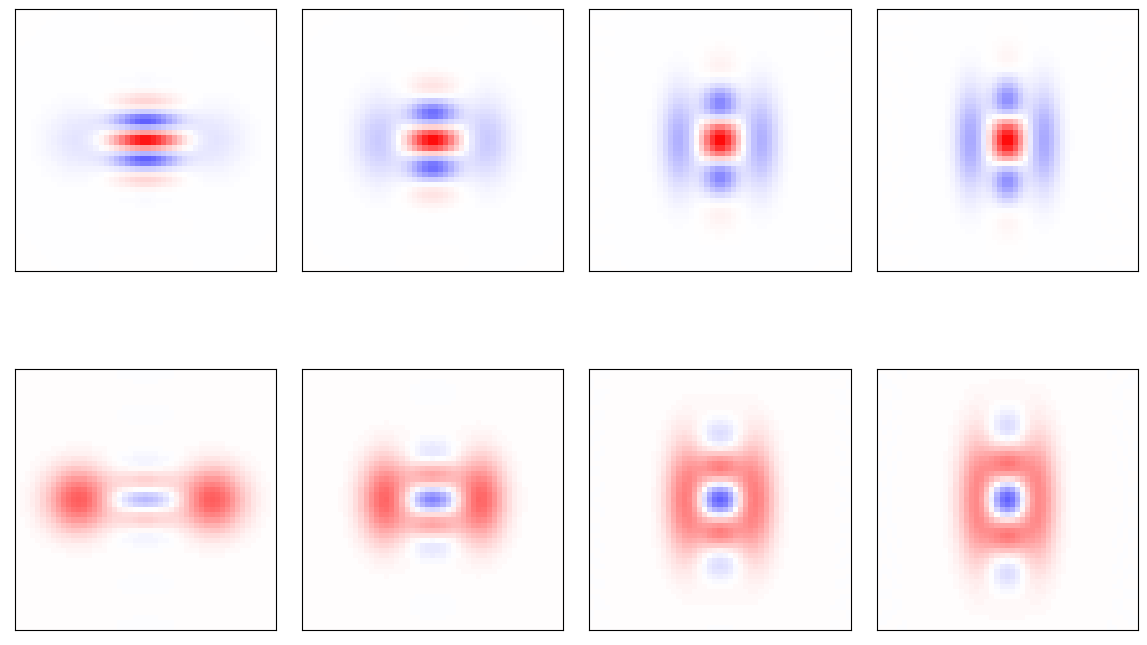

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [90]:
fig, axs = plt.subplots(2,len(states))

for i, rho in enumerate(rhos):
    
    plot_char(rho[6], ax=axs[0][i],max_alpha = 6 )
    plot_wigner(rho[6], ax=axs[1][i],max_alpha = 3 )
fig.tight_layout()

### Wigner negativity

Text(0, 0.5, 'average side Blob Amp')

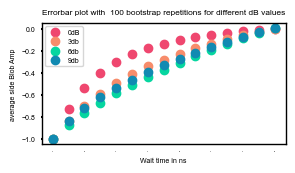

In [7]:
data = np.load('data/wigner_negativity.npz')
wigner_negativity = data["negativity_loss2"]
times = data["rel_t1"]


fig1, ax = plt.subplots()

ax.plot(times[:], wigner_negativity[0], 'o', label = '0dB',  color = '#ef476f')
ax.plot(times[:], wigner_negativity[1],'o', label = '3db',  color = '#f78c6b')
ax.plot(times[:], wigner_negativity[2],  'o', label = '6db',  color = '#06d6a0')
ax.legend()
ax.plot(times[:], wigner_negativity[3],  'o', label = '9db',  color = '#118ab2')
ax.legend()
ax.set_title(f'Errorbar plot with  100 bootstrap repetitions for different dB values')
ax.set_xlabel('Wait time in ns')
ax.set_ylabel("average side Blob Amp")

## Create the Layout and then fill it

NameError: name 'cat_blob_amps' is not defined

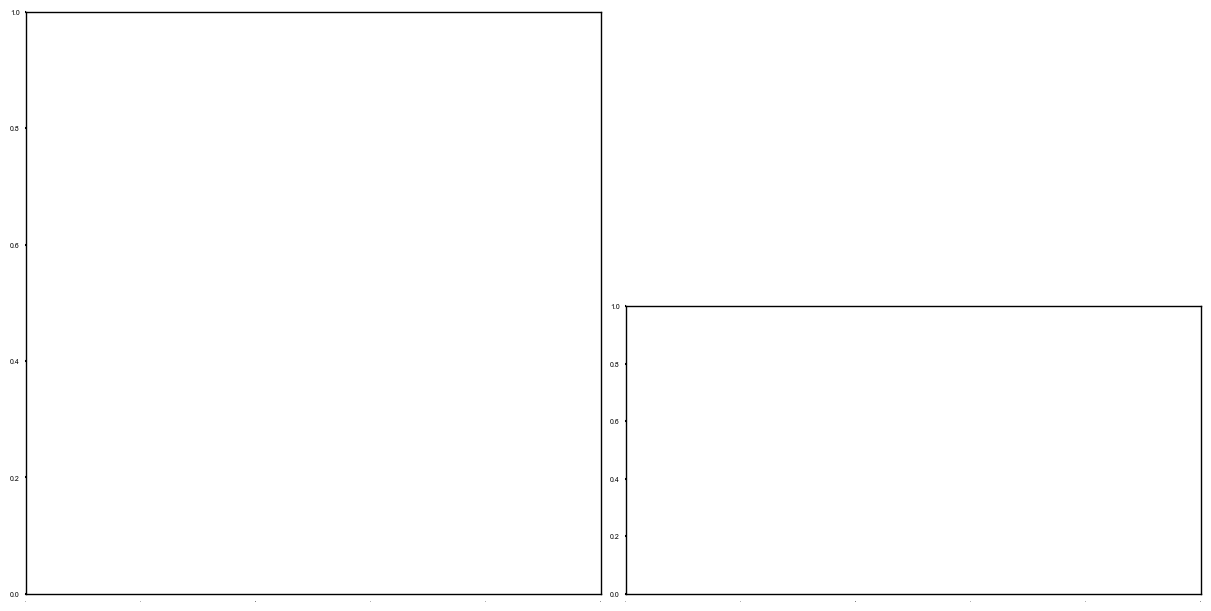

In [8]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


fig = plt.figure(constrained_layout=True, figsize = (12,6))

gs = GridSpec(4, 8, figure=fig)

ax1 = fig.add_subplot(gs[:, 0:4])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
#ax2 = fig.add_subplot(gs[0:2, 4:])
ax3 = fig.add_subplot(gs[2:, 4:])

# fill ax1
ax1.errorbar(decay_times[:], cat_blob_amps[0],yerr=error_bars[0],fmt= 'o', label = '0dB', capsize = 2, color = '#ef476f',)
ax1.errorbar(decay_times[:], cat_blob_amps[1],yerr=error_bars[1],fmt= 'o', label = '2db', capsize = 2, color = '#f78c6b')
ax1.errorbar(decay_times[:], cat_blob_amps[2],yerr=error_bars[2],fmt= 'o', label = '4.8db', capsize = 2, color = '#06d6a0')
ax1.errorbar(decay_times[:], cat_blob_amps[3],yerr=error_bars[3],fmt= 'o', label = '7.1db', capsize = 2, color = '#118ab2')
ax1.legend()

#fill ax2
for i, rho in enumerate(rhos):
    plot_char(rhos[i][6], ax=fig.add_subplot(gs[0, 4+i]),max_alpha = 6 )
    plot_wigner(rhos[i][6], ax=fig.add_subplot(gs[1, 4+i]),max_alpha = 3 )

# fill ax3
ax3.plot(times[:], wigner_negativity[0], 'o', label = '0dB',  color = '#ef476f')
ax3.plot(times[:], wigner_negativity[1],'o', label = '3db',  color = '#f78c6b')
ax3.plot(times[:], wigner_negativity[2],  'o', label = '6db',  color = '#06d6a0')
ax3.legend()
ax3.plot(times[:], wigner_negativity[3],  'o', label = '9db',  color = '#118ab2')
ax3.legend()
ax3.set_title(f'Errorbar plot with  100 bootstrap repetitions for different dB values')
ax3.set_xlabel('Wait time in ns')
ax.set_ylabel("average side Blob Amp")


fig.suptitle("Protecting Coherence", fontsize=20)

fig.savefig("Protecting_Coherence.pdf")

C:\Users\jonat\AppData\Local\Temp\ipykernel_26284\2458436297.py:140: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = ax.pcolormesh(xvec, xvec, (CF_real), cmap = 'bwr', vmin=vmin, vmax=vmax, shading='auto')


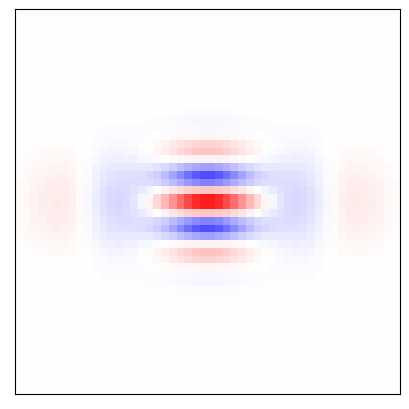

In [4]:
N = 200

Iq = qeye(2)
Ic = qeye(N)
a = destroy(N)
n = a.dag()*a

psi = displace(N,0.2j)*(coherent(N,1.8) - coherent(N,-1.8)).unit()
plot_char(psi, max_alpha = 6)

### fit exponentials

In [11]:
colours = [([0.07, 0.49, 0.44]),
 ([0.95, 0.65, 0.23]),
 ([0.95, 0.29, 0.14]),
 ([0.45, 0.13, 0.34]),
 ([0.13, 0.13, 0.26])]

In [30]:
from scipy.optimize import curve_fit
import numpy as np
vac_scale = 0.883
bootstrap_data = np.load('data/bootstrap_data.npy')[0]/vac_scale
bootstrap_error_bars = np.load('data/bootstrap_data.npy')[1]/vac_scale

decay_times = np.array([  1.,  10.,  20.,  35.,  50.,  70., 100.,
       150., 200.])

xvec = np.linspace(0,1000,100)

def exp_decay(x,T, amp, offset):
    return offset-amp*np.exp(-x/T)


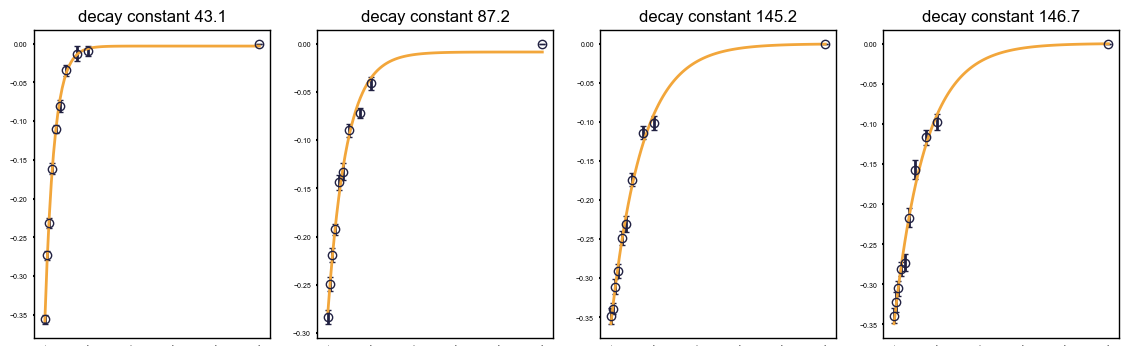

In [31]:
time_scales = []
theory_lines = []
compression = [0, 3, 6.7, 7.6]
fig, axs = plt.subplots(1, len(bootstrap_data), figsize = (14,4))
decay_times = np.concatenate((decay_times, np.array([1000], dtype = np.float64)))
for i, data in enumerate(bootstrap_data):
    p0  = [100, 1, 0]
    bounds = ([-np.inf, -np.inf, -np.inf ],[np.inf, np.inf, np.inf]) 
    data = np.concatenate((data, np.array([0], dtype = np.float64)))
    popt, pcov = curve_fit(exp_decay, decay_times, data, p0 = p0, bounds = bounds)
    time_scales.append(popt[0])
    theory_lines.append(exp_decay(xvec, *popt))
    axs[i].errorbar(decay_times,  data,   yerr=np.concatenate((bootstrap_error_bars[i],np.array([0], dtype = np.float64))), fmt= 'o',markerfacecolor='none',  capsize = 2, color = colours[4])
    axs[i].plot(xvec, theory_lines[i], color = colours[1])
    axs[i].set_title(f'decay constant {np.round(popt[0],1)}', fontsize = 12)

In [30]:
np.concatenate((bootstrap_error_bars[0],np.array([0], dtype = np.float64)))

array([0.0052184 , 0.00511084, 0.00609423, 0.00630393, 0.0050173 ,
       0.00657095, 0.00629138, 0.00861439, 0.00566852, 0.        ])

In [62]:
np.savez("time_constant_data", bootstrap_data = bootstrap_data , bootstrap_error_bars = bootstrap_error_bars, xvec= xvec, theory_lines = theory_lines)

## Fit Radims function

In [105]:
from lmfit import Model

# setup model

def exp_decay_radim(x, T, amp, offset, dB):
    xi = calc_squeez_parameter(dB)
    s = np.exp(-xi)
    return offset-amp*np.exp(-x*s/(2*T))

gmodel = Model(exp_decay_radim)
print(f'parameter names: {gmodel.param_names}')
print(f'independent variables: {gmodel.independent_vars}')

parameter names: ['T', 'amp', 'offset', 'dB']
independent variables: ['x']


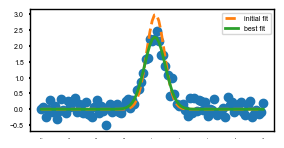

In [101]:
params = gmodel.make_params(cen=0.3, amp=3, wid=1.25)
x_eval = np.linspace(0, 10, 201)
y_eval = gmodel.eval(params, x=x_eval)
result = gmodel.fit(y, params, x=x)
result.fit_report()
plt.plot(x, y, 'o')
plt.plot(x, result.init_fit, '--', label='initial fit')
plt.plot(x, result.best_fit, '-', label='best fit')
plt.legend()
plt.show()

In [82]:
from scipy.optimize import curve_fit
import numpy as np
vac_scale = 0.883
bootstrap_data = np.load('data/bootstrap_data.npy')[0]/vac_scale
bootstrap_error_bars = np.load('data/bootstrap_data.npy')[1]/vac_scale

decay_times = np.array([  1.,  10.,  20.,  35.,  50.,  70., 100.,
       150., 200.])

xvec = np.linspace(0,1000,100)


def exp_decay_radim(x, T, amp, offset):
    xi = calc_squeez_parameter(db)
    s = np.exp(-xi)
    return offset-amp*np.exp(-x*s/(2*T))

For 0 dB, we find a decay constant of 21.5


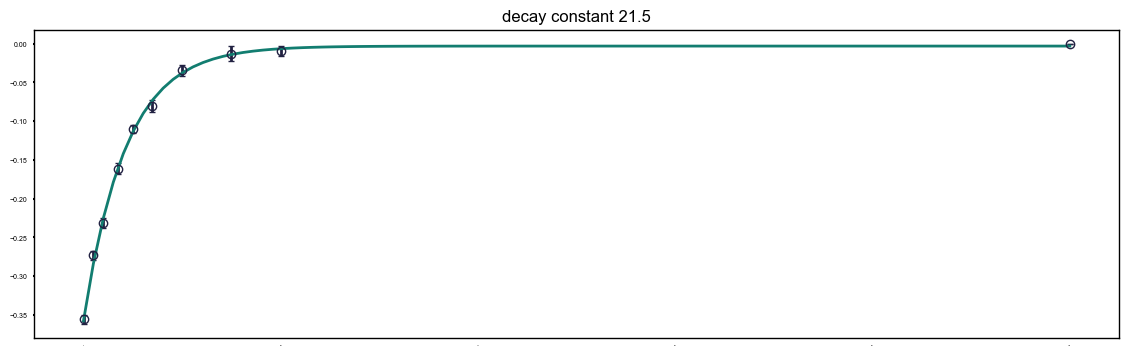

In [72]:
# 0 dB

dB = 0

def exp_decay_radim(x, T, amp, offset):
    xi = calc_squeez_parameter(dB)
    s = np.exp(-xi)
    return offset-amp*np.exp(-x*s/(2*T))

time_scales = []
theory_lines = []

fig, axs = plt.subplots( figsize = (14,4))
decay_times_add1k = np.concatenate((decay_times, np.array([1000], dtype = np.float64)))

data = bootstrap_data[0]
p0  = [100, 1, 0]
bounds = ([-np.inf, -np.inf, -np.inf ],[np.inf, np.inf, np.inf]) 
data_concat = np.concatenate((data, np.array([0], dtype = np.float64)))
popt, pcov = curve_fit(exp_decay_radim, decay_times_add1k, data_concat, p0 = p0, bounds = bounds)
time_scales.append(popt[0])
theory_lines.append(exp_decay_radim(xvec, *popt))
axs.errorbar(decay_times_add1k,  data_concat,   yerr=np.concatenate((bootstrap_error_bars[0],np.array([0], dtype = np.float64))), fmt= 'o',markerfacecolor='none',  capsize = 2, color = colours[4])
axs.plot(xvec, theory_lines[0], color = colours[0])
axs.set_title(f'decay constant {np.round(popt[0],1)}', fontsize = 12)

print(f"For {dB} dB, we find a decay constant of {np.round(popt[0],1)}")

For 3 dB, we find a decay constant of 21.9


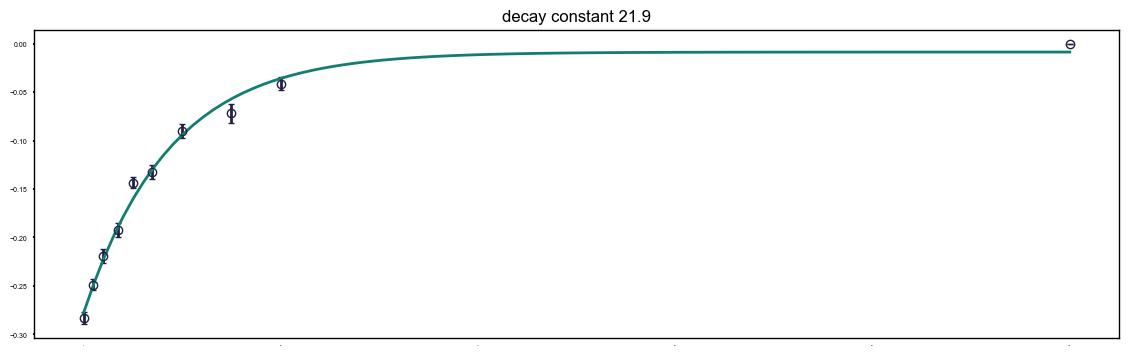

In [73]:
# 0 dB

dB = 3

def exp_decay_radim(x, T, amp, offset):
    xi = calc_squeez_parameter(dB)
    s = np.exp(-xi)
    return offset-amp*np.exp(-x*s**2/(2*T))

time_scales = []
theory_lines = []

fig, axs = plt.subplots( figsize = (14,4))
decay_times_add1k = np.concatenate((decay_times, np.array([1000], dtype = np.float64)))

data = bootstrap_data[1]
p0  = [100, 1, 0]
bounds = ([-np.inf, -np.inf, -np.inf ],[np.inf, np.inf, np.inf]) 
data_concat = np.concatenate((data, np.array([0], dtype = np.float64)))
popt, pcov = curve_fit(exp_decay_radim, decay_times_add1k, data_concat, p0 = p0, bounds = bounds)
time_scales.append(popt[0])
theory_lines.append(exp_decay_radim(xvec, *popt))
axs.errorbar(decay_times_add1k,  data_concat,   yerr=np.concatenate((bootstrap_error_bars[0],np.array([0], dtype = np.float64))), fmt= 'o',markerfacecolor='none',  capsize = 2, color = colours[4])
axs.plot(xvec, theory_lines[0], color = colours[0])
axs.set_title(f'decay constant {np.round(popt[0],1)}', fontsize = 12)

print(f"For {dB} dB, we find a decay constant of {np.round(popt[0],1)}")

For 6.7 dB, we find a decay constant of 15.5


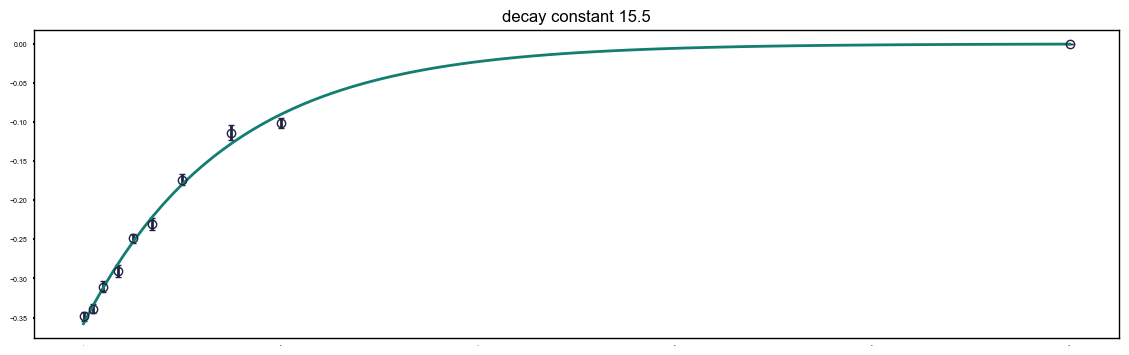

In [80]:
# 0 dB

dB = 6.7

def exp_decay_radim(x, T, amp, offset):
    xi = calc_squeez_parameter(dB)
    s = np.exp(-xi)
    return offset-amp*np.exp(-x*s**2/(2*T))

time_scales = []
theory_lines = []

fig, axs = plt.subplots( figsize = (14,4))
decay_times_add1k = np.concatenate((decay_times, np.array([1000], dtype = np.float64)))

data = bootstrap_data[2]
p0  = [30, 1, 0]
bounds = ([-np.inf, -np.inf, -np.inf ],[np.inf, np.inf, np.inf]) 
data_concat = np.concatenate((data, np.array([0], dtype = np.float64)))
popt, pcov = curve_fit(exp_decay_radim, decay_times_add1k, data_concat, p0 = p0, bounds = bounds)
time_scales.append(popt[0])
theory_lines.append(exp_decay_radim(xvec, *popt))
axs.errorbar(decay_times_add1k,  data_concat,   yerr=np.concatenate((bootstrap_error_bars[0],np.array([0], dtype = np.float64))), fmt= 'o',markerfacecolor='none',  capsize = 2, color = colours[4])
axs.plot(xvec, theory_lines[0], color = colours[0])
axs.set_title(f'decay constant {np.round(popt[0],1)}', fontsize = 12)

print(f"For {dB} dB, we find a decay constant of {np.round(popt[0],1)}")

For 7.6 dB, we find a decay constant of 12.7


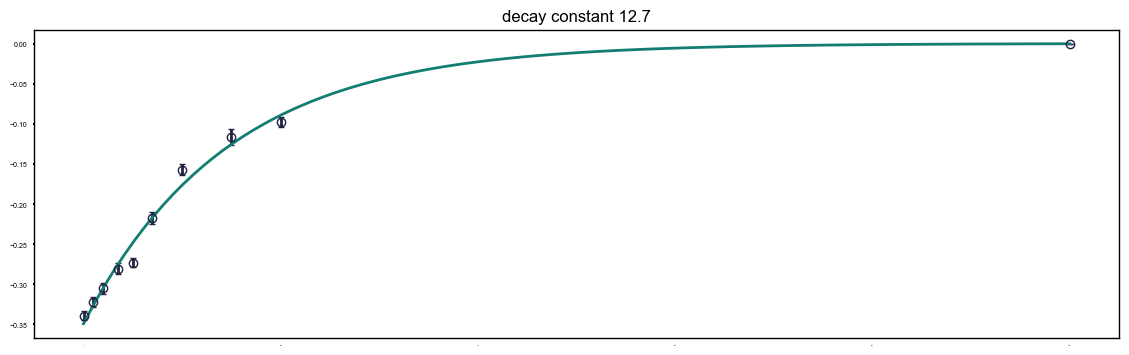

In [81]:
# 0 dB

dB = 7.6

def exp_decay_radim(x, T, amp, offset):
    xi = calc_squeez_parameter(dB)
    s = np.exp(-xi)
    return offset-amp*np.exp(-x*s**2/(2*T))

time_scales = []
theory_lines = []

fig, axs = plt.subplots( figsize = (14,4))
decay_times_add1k = np.concatenate((decay_times, np.array([1000], dtype = np.float64)))

data = bootstrap_data[3]
p0  = [20, 1, 0]
bounds = ([-np.inf, -np.inf, -np.inf ],[np.inf, np.inf, np.inf]) 
data_concat = np.concatenate((data, np.array([0], dtype = np.float64)))
popt, pcov = curve_fit(exp_decay_radim, decay_times_add1k, data_concat, p0 = p0, bounds = bounds)
time_scales.append(popt[0])
theory_lines.append(exp_decay_radim(xvec, *popt))
axs.errorbar(decay_times_add1k,  data_concat,   yerr=np.concatenate((bootstrap_error_bars[0],np.array([0], dtype = np.float64))), fmt= 'o',markerfacecolor='none',  capsize = 2, color = colours[4])
axs.plot(xvec, theory_lines[0], color = colours[0])
axs.set_title(f'decay constant {np.round(popt[0],1)}', fontsize = 12)

print(f"For {dB} dB, we find a decay constant of {np.round(popt[0],1)}")

In [ ]:
time_scales = []
theory_lines = []
compression = [0, 3, 6.7, 7.6]
fig, axs = plt.subplots(1, len(bootstrap_data), figsize = (14,4))
decay_times = np.concatenate((decay_times, np.array([1000], dtype = np.float64)))
for i, data in enumerate(bootstrap_data):
    p0  = [100, 1, 0]
    bounds = ([-np.inf, -np.inf, -np.inf ],[np.inf, np.inf, np.inf]) 
    data = np.concatenate((data, np.array([0], dtype = np.float64)))
    popt, pcov = curve_fit(exp_decay_radim, decay_times, data, p0 = p0, bounds = bounds)
    time_scales.append(popt[0])
    theory_lines.append(exp_decay(xvec, *popt))
    axs[i].errorbar(decay_times,  data,   yerr=np.concatenate((bootstrap_error_bars[i],np.array([0], dtype = np.float64))), fmt= 'o',markerfacecolor='none',  capsize = 2, color = colours[4])
    axs[i].plot(xvec, theory_lines[i], color = colours[1])
    axs[i].set_title(f'decay constant {np.round(popt[0],1)}', fontsize = 12)